In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Прочитайте данные (переменную назовите 'df')
df = pd.read_csv('data.csv')

# Вывести несколько первых строк таблицы данных
print(df.head())

         Дата  Склад Контрагент Номенклатура  Количество
0  2018-01-04      1  address_0    product_0           4
1  2018-01-04      1  address_0    product_1           4
2  2018-01-04      1  address_0    product_2           5
3  2018-01-04      1  address_0    product_3          10
4  2018-01-04      1  address_0    product_4           2


Проверяем формат столбцов

In [3]:
print(df.dtypes)

Дата            object
Склад            int64
Контрагент      object
Номенклатура    object
Количество       int64
dtype: object


Сразу переведем столбец "Дата" в правильный формат

In [4]:
df['Дата'] = pd.to_datetime(df['Дата'], format='%Y-%m-%d')
print(df.dtypes)

Дата            datetime64[ns]
Склад                    int64
Контрагент              object
Номенклатура            object
Количество               int64
dtype: object


Сгруппируйте данные по дате, посчитайте количество продаж

In [5]:
# Количество строк (транзакций) в каждой дате
grouped_df = df.groupby('Дата').size().reset_index(name='Количество_продаж')

Вывести несколько первых строк сгруппированных данных

In [6]:
print(grouped_df.head())

        Дата  Количество_продаж
0 2018-01-04               1840
1 2018-01-05               1301
2 2018-01-06               1306
3 2018-01-07               1322
4 2018-01-09               1719


Нарисуйте график продаж у `grouped_df`

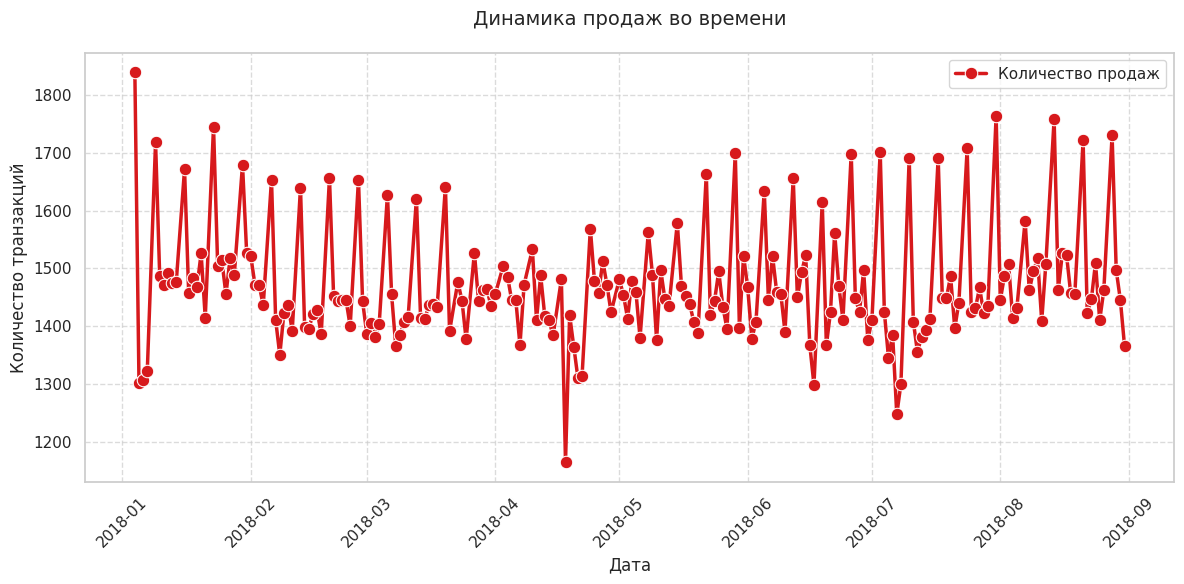

In [7]:
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")


ax = sns.lineplot(data=grouped_df, x='Дата', y='Количество_продаж', marker='o', markersize=9, linewidth=2.5, color='#d7191c', label='Количество продаж')

ax.set_title('Динамика продаж во времени', fontsize=14, pad=20)
ax.set_xlabel('Дата', fontsize=12)
ax.set_ylabel('Количество транзакций', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

ax.grid(True, linestyle='--', alpha=0.7)

plt.show()

Опишите что вы видите на графике. Ваша задача - максимально описать график

> На графике изображена динамика продаж за определенный временной период.

> **Ось X (горизонтальная)**: Представлены даты, начиная с января 2018 года и заканчивая сентябрем 2018 года. Эти данные отражают временную шкалу.

> **Ось Y (вертикальная)**: Показывает количество транзакций. Значения варьируются от 1200 до 1800 транзакций.

> **Кривая на графике**: Красная линия с точками, которая отображает количество продаж в разные дни в течение рассматриваемого периода. График демонстрирует колебания в активности продаж:

>> В начале года, в январе 2018 года, наблюдается пик продаж, достигающий значения выше 1800 транзакций.

>> В течение года количество транзакций продолжает колебаться, иногда достигая локальных максимумов и минимумов. Например, в мае и июне присутствуют значительные колебания, часто доходящие до 1700 транзакций.

>> В августе и сентябре также видно несколько резких изменений в количестве транзакций.

> **Тренды и выводы**:

>> Видны периоды увеличения и снижения продаж. Например, периоды с пиками могут указывать на сезоны высокой активности или специальные мероприятия (акции, праздники).

>> Спады могли быть вызваны внешними факторами, такими как сезонное снижение спроса.


Найдите строку, у которой максимальный выброс по количеству продаж (нужно найти выброс у `df`)

In [8]:
Q1 = df['Количество'].quantile(0.25)
Q3 = df['Количество'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Количество'] < lower_bound) | (df['Количество'] > upper_bound)]

max_outlier_row = outliers.loc[outliers['Количество'].idxmax()]

print("Максимальный выброс по количеству продаж:")
print(max_outlier_row)

Максимальный выброс по количеству продаж:
Дата            2018-06-28 00:00:00
Склад                             1
Контрагент              address_208
Номенклатура              product_0
Количество                      200
Name: 218822, dtype: object


Найдите топовый товар по продажам по средам за июнь, июль, август у 3 склада

In [9]:
# Фильтрация данных:
# 1. По складу 3
# 2. По месяцам: июнь (6), июль (7), август (8)
# 3. По дню недели: среда (2)
filtered_data = df[(df['Склад'] == 3) & (df['Дата'].dt.month.isin([6, 7, 8])) & (df['Дата'].dt.dayofweek == 2)]

# Группировка по номенклатуре и суммирование продаж
top_product = filtered_data.groupby('Номенклатура')['Количество'].sum().reset_index()

# Поиск строки с максимальным значением
max_sales_row = top_product.loc[top_product['Количество'].idxmax()]

print(f"Топовый товар: {max_sales_row['Номенклатура']}")
print(f"Общее количество продаж: {max_sales_row['Количество']}")

Топовый товар: product_1
Общее количество продаж: 2267


Скачайте данные по погоде с https://rp5.ru/Архив_погоды_в_Астане (скачайте исходные данные, и далее преобразуйте так, чтобы мы имели Дату и Среднюю температуру за день), объедините таблицу температуры с `grouped_df`, и нарисуйте график `y=['Количество продаж', 'T']`, где Т это температура. А также отдельно график температуры.

In [10]:
# определение дат для архива
print(df['Дата'].min())
print(df['Дата'].max())

2018-01-04 00:00:00
2018-08-31 00:00:00


In [36]:
df_weather = pd.read_excel('Astana weather archive.xls', sheet_name='Архив Погоды rp5')
df_weather.head()

,Местное время в Астане,T,Po,P,Pa,U,DD,Ff,ff10,ff3,...,Cm,Ch,VV,Td,RRR,tR,E,Tg,E',sss
0,31.08.2018 21:00,9.6,736.4,767.9,1.2,88.0,"Ветер, дующий с западо-северо-запада",3,NaN,NaN,...,"Высококучевых, высокослоистых или слоисто-дожд...","Перистых, перисто-кучевых или перисто-слоистых...",NaN,7.7,Следы осадков,12.0,NaN,NaN,NaN,NaN
1,31.08.2018 18:00,11.3,735.2,766.4,0.4,83.0,"Ветер, дующий с востоко-северо-востока",4,NaN,NaN,...,NaN,NaN,10.0,8.5,NaN,NaN,NaN,NaN,NaN,NaN
2,31.08.2018 15:00,12.3,734.8,765.9,0.9,80.0,"Ветер, дующий с северо-востока",4,NaN,NaN,...,NaN,NaN,4.0,8.9,NaN,NaN,NaN,NaN,NaN,NaN
3,31.08.2018 12:00,13.2,733.9,764.8,1.0,83.0,"Ветер, дующий с северо-северо-востока",4,NaN,NaN,...,NaN,NaN,10.0,10.3,3,12.0,NaN,NaN,NaN,NaN
4,31.08.2018 09:00,12.5,732.9,763.9,0.1,99.0,"Ветер, дующий с северо-северо-запада",2,NaN,NaN,...,NaN,NaN,4.0,12.3,3,12.0,Поверхность почвы сырая (вода застаивается на ...,8.0,NaN,NaN


In [37]:
print("\nТипы данных столбцов:")
print(df_weather.dtypes)


Типы данных столбцов:
Местное время в Астане     object
T                         float64
Po                        float64
P                         float64
Pa                        float64
U                         float64
DD                         object
Ff                          int64
ff10                      float64
ff3                       float64
N                          object
WW                         object
W1                         object
W2                         object
Tn                        float64
Tx                        float64
Cl                         object
Nh                         object
H                          object
Cm                         object
Ch                         object
VV                        float64
Td                        float64
RRR                        object
tR                        float64
E                          object
Tg                        float64
E'                         object
sss                      

In [39]:
# Преобразование времени (с учётом русского формата ДД.ММ.ГГГГ)
df_weather['Дата_время'] = pd.to_datetime(df_weather['Местное время в Астане'],
                                          format='%d.%m.%Y %H:%M',
                                          errors='coerce')

In [40]:
# Проверка успешного преобразования
print("Пример преобразованной даты:")
print(df_weather[['Местное время в Астане', 'Дата_время']].head())

Пример преобразованной даты:
  Местное время в Астане          Дата_время
0       31.08.2018 21:00 2018-08-31 21:00:00
1       31.08.2018 18:00 2018-08-31 18:00:00
2       31.08.2018 15:00 2018-08-31 15:00:00
3       31.08.2018 12:00 2018-08-31 12:00:00
4       31.08.2018 09:00 2018-08-31 09:00:00


In [41]:
# Создание столбца только с датой
df_weather['Дата'] = df_weather['Дата_время'].dt.normalize()

In [42]:
# Группировка и агрегация
daily_temp = df_weather.groupby('Дата')['T'].agg(
    Средняя_температура='mean',
    Количество_измерений='count'
).reset_index()

In [44]:
# Вывод результата
print("\nПервые 5 строк агрегированных данных:")
print(daily_temp.head())


Первые 5 строк агрегированных данных:
        Дата  Средняя_температура  Количество_измерений
0 2018-01-04             -13.0875                     8
1 2018-01-05             -17.2500                     8
2 2018-01-06             -14.1250                     8
3 2018-01-07             -12.3375                     8
4 2018-01-08             -15.4375                     8


In [32]:
# Проверка типа данных столбца 'Дата' в обеих таблицах
print("Тип данных в daily_temp['Дата']:", daily_temp['Дата'].dtype)
print("Тип данных в grouped_df['Дата']:", grouped_df['Дата'].dtype)

Тип данных в daily_temp['Дата']: object
Тип данных в grouped_df['Дата']: datetime64[ns]


In [46]:
# Преобразование даты в grouped_df в формат datetime
daily_temp['Дата'] = pd.to_datetime(daily_temp['Дата'], errors='coerce')
grouped_df['Дата'] = pd.to_datetime(grouped_df['Дата'])

In [49]:
# Объединение таблиц
merged_df = pd.merge(
    daily_temp,
    grouped_df,
    on='Дата',
    how='inner'
)

print("Первые 5 строк объединённой таблицы:")
print(merged_df.head())

Первые 5 строк объединённой таблицы:
        Дата  Средняя_температура  Количество_измерений  Количество_продаж
0 2018-01-04             -13.0875                     8               1840
1 2018-01-05             -17.2500                     8               1301
2 2018-01-06             -14.1250                     8               1306
3 2018-01-07             -12.3375                     8               1322
4 2018-01-09              -7.3875                     8               1719


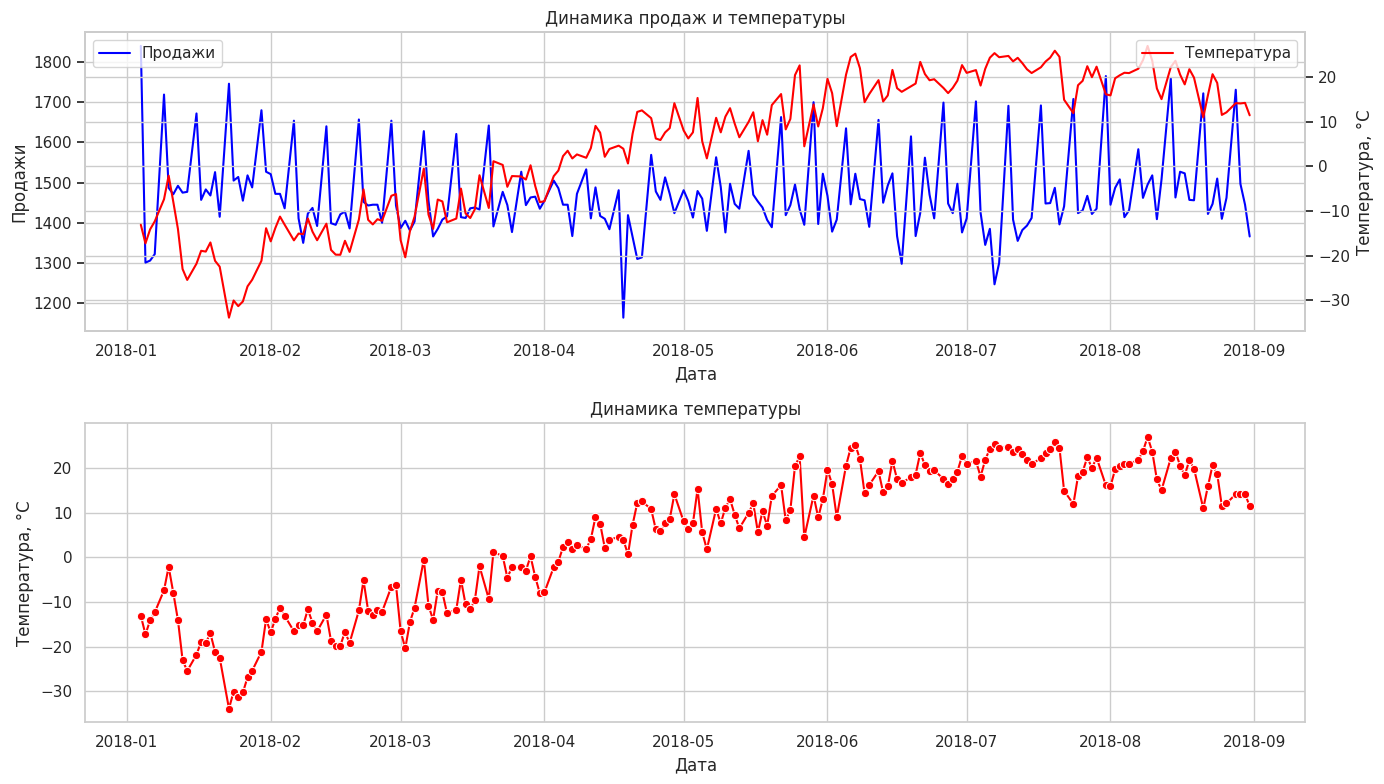

In [55]:
# Установка стиля Seaborn
sns.set(style="whitegrid")

# Создание фигуры с двумя графиками
plt.figure(figsize=(14, 8))

# Первый график: Продажи и температура (два y-axis)
plt.subplot(2, 1, 1)
ax1 = sns.lineplot(x='Дата', y='Количество_продаж', data=merged_df, color='blue', label='Продажи')
ax2 = ax1.twinx()
sns.lineplot(x='Дата', y='Средняя_температура', data=merged_df, color='red', ax=ax2, label='Температура')
plt.title('Динамика продаж и температуры')
ax1.set_ylabel('Продажи')
ax2.set_ylabel('Температура, °C')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Второй график: Только температура
plt.subplot(2, 1, 2)
sns.lineplot(x='Дата', y='Средняя_температура', data=merged_df, color='red', marker='o')
plt.title('Динамика температуры')
plt.ylabel('Температура, °C')
plt.xlabel('Дата')
plt.grid(True)

# Настройка макета
plt.tight_layout()
plt.show()